In [54]:
from datetime import date, timedelta
from bs4 import BeautifulSoup
import collections
import itertools
import requests
import igraph

today = date.today()
previousYears = (date(year, month+1, 1) for year in range(2017, today.year) for month in range(12))
thisYear = (date(2021, month+1, 1) for month in range(today.month))
'''
f = open("artists.txt", "w", encoding='utf8')
edges = set()
for day in itertools.chain(previousYears, thisYear):
    print(day)
    page = requests.get(f"https://spotifycharts.com/regional/global/daily/{day}")
    soup = BeautifulSoup(page.content, 'html.parser')
    tracks = soup.find_all('td', class_="chart-table-track")[1:]
    for track in tracks:
        try:
            by = str(track).split("<span>by ")[1].split("</span>")[0]
        except:
            print(by)
        if ',' in by:
            artists = sorted(i.strip() for i in by.split(','))
            edges.update(itertools.combinations(artists, 2))
for edge in sorted(edges):
    f.write(f"{edge[0]}, {edge[1]}\n")
f.close()
'''
pass

In [11]:
ids = collections.defaultdict(itertools.count().__next__)
edges = []
with open("savedArtists.txt", "r", encoding='utf8') as f:
    for line in f:
        source, target = line.rstrip().split(', ')
        edges.append((ids[source], ids[target]))

In [62]:
g = igraph.Graph(edges=edges)
g.vs["name"] = list(ids.keys())

In [63]:
components = g.components()
print(len(components))

90


In [64]:
sizes = components.sizes()
for item in sorted(collections.Counter(sizes).items()):
    print(item)

(2, 64)
(3, 16)
(4, 1)
(5, 1)
(6, 3)
(8, 2)
(9, 1)
(19, 1)
(422, 1)


In [65]:
giant = components.giant()
degrees = giant.degree()

In [66]:
for item in sorted(collections.Counter(degrees).items()):
    print(item)

(1, 127)
(2, 81)
(3, 45)
(4, 38)
(5, 32)
(6, 19)
(7, 11)
(8, 14)
(9, 4)
(10, 4)
(11, 5)
(12, 9)
(13, 5)
(14, 4)
(15, 3)
(16, 1)
(17, 3)
(18, 2)
(19, 1)
(20, 1)
(21, 1)
(22, 2)
(25, 1)
(26, 2)
(29, 1)
(30, 1)
(33, 2)
(35, 1)
(45, 1)
(47, 1)


In [67]:
giant.vs.select(_degree = giant.maxdegree())["name"]

['J Balvin']

In [68]:
sortedVertices = [v for d, v in sorted(zip(degrees, giant.vs), reverse=True)[:20]]

In [69]:
for v in sortedVertices:
    print(v.degree(), v["name"])

47 J Balvin
45 Bad Bunny
35 Daddy Yankee
33 Ozuna
33 Farruko
30 Anuel AA
29 Nicky Jam
26 Sech
26 Myke Towers
25 Drake
22 Dalex
22 David Guetta
21 Lenny Tavárez
20 Natti Natasha
19 Travis Scott
18 Wisin
18 Anitta
17 Kygo
17 Justin Quiles
17 Rauw Alejandro


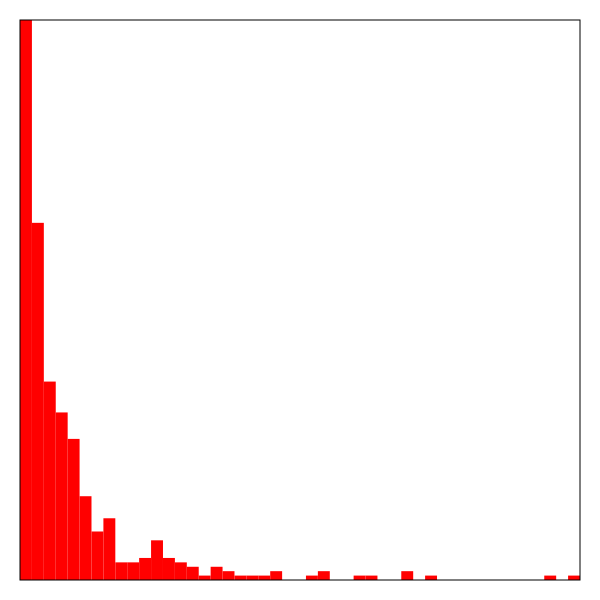

In [51]:
igraph.plot(giant.degree_distribution())